# Tutorial: Surface plot with BrainView Guideline  
__Content creator:__ Raul R Cruces  
__pod name__: Truthful-inchworms 149

First we load the necessary libraries

In [154]:
#@title Import functions
%matplotlib inline  
!pip install brainspace --quiet
import numpy as np
from brainspace.datasets import load_conte69
from brainspace.plotting import plot_hemispheres, plot_surf
from brainspace.utils.parcellation import map_to_labels
import panel as pn
pn.extension('vtk')
import os # OS to handle paths
import pandas as pd # pandas for data framse
import matplotlib.pyplot as plt # For changing the color maps
from matplotlib import cm # cm=colormap
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from hcp_regions import HCPRegions
import ipywidgets as widgets       # interactive display


## Glasser parcellation: Region Names and Index  
<img src="balsa.wustl-1.png" width=75% height=75% /> <img src="balsa.wustl-2.png" width=75% height=75% />

In [43]:
# Region names are entered as strings indexes as int
hcpRegions = HCPRegions()
hcpRegions.what_is('4', verbose=True)

Region 4
ParcelIndex: 8
Area description: Primary Motor Cortex
Other names: BA4, 4a, 4p, M1, PMC, F1
New?: No
Sections: 6,7,8,9
Key studies: Fischl et al 2008, Geyer et al 1996


### 1. Load the Glasser annot and conte 69 surface

In [282]:
# First load the Glasser annotation file
Glasser = np.loadtxt('glasser_360_conte69.csv', dtype=np.int)

# and load the conte69 surfaces
surf_lh, surf_rh = load_conte69()

### 2. Plot the labels over the surface

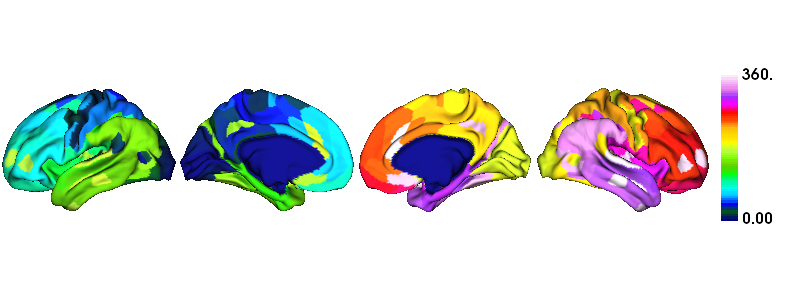

In [284]:
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser, size=(800, 300),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

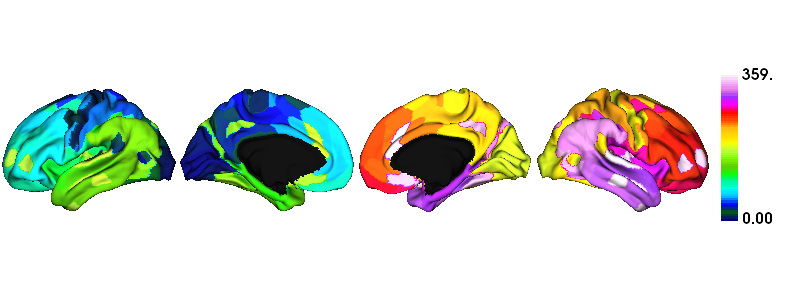

In [287]:
# mask the 0-value ROI of the medial wall
mask = Glasser != 0

# Create an array of the Unique values (Nrois x 1 ) as float
GlasserROIs = np.asarray(np.unique(Glasser), dtype=float)

# Map ROI to vertices indexes (Nvertices x 1)
Glasser_masked = map_to_labels(GlasserROIs, Glasser, mask=mask, fill=np.nan)

# Plot ROIs with masked medial wall
plot_hemispheres(surf_lh, surf_rh, array_name=Glasser_masked, size=(800, 300), nan_color=(0, 0, 0, 1),
                 cmap='gist_ncar', zoom=1.25, color_bar=True, embed_nb=True, interactive=False)

### 2.1 Highlight bilateral Primary Motor Cortex
Name of ROI: **4**  
Parcel Index: Right=**8**, Left=**8+180**  
Area description: Primary Motor Cortex  

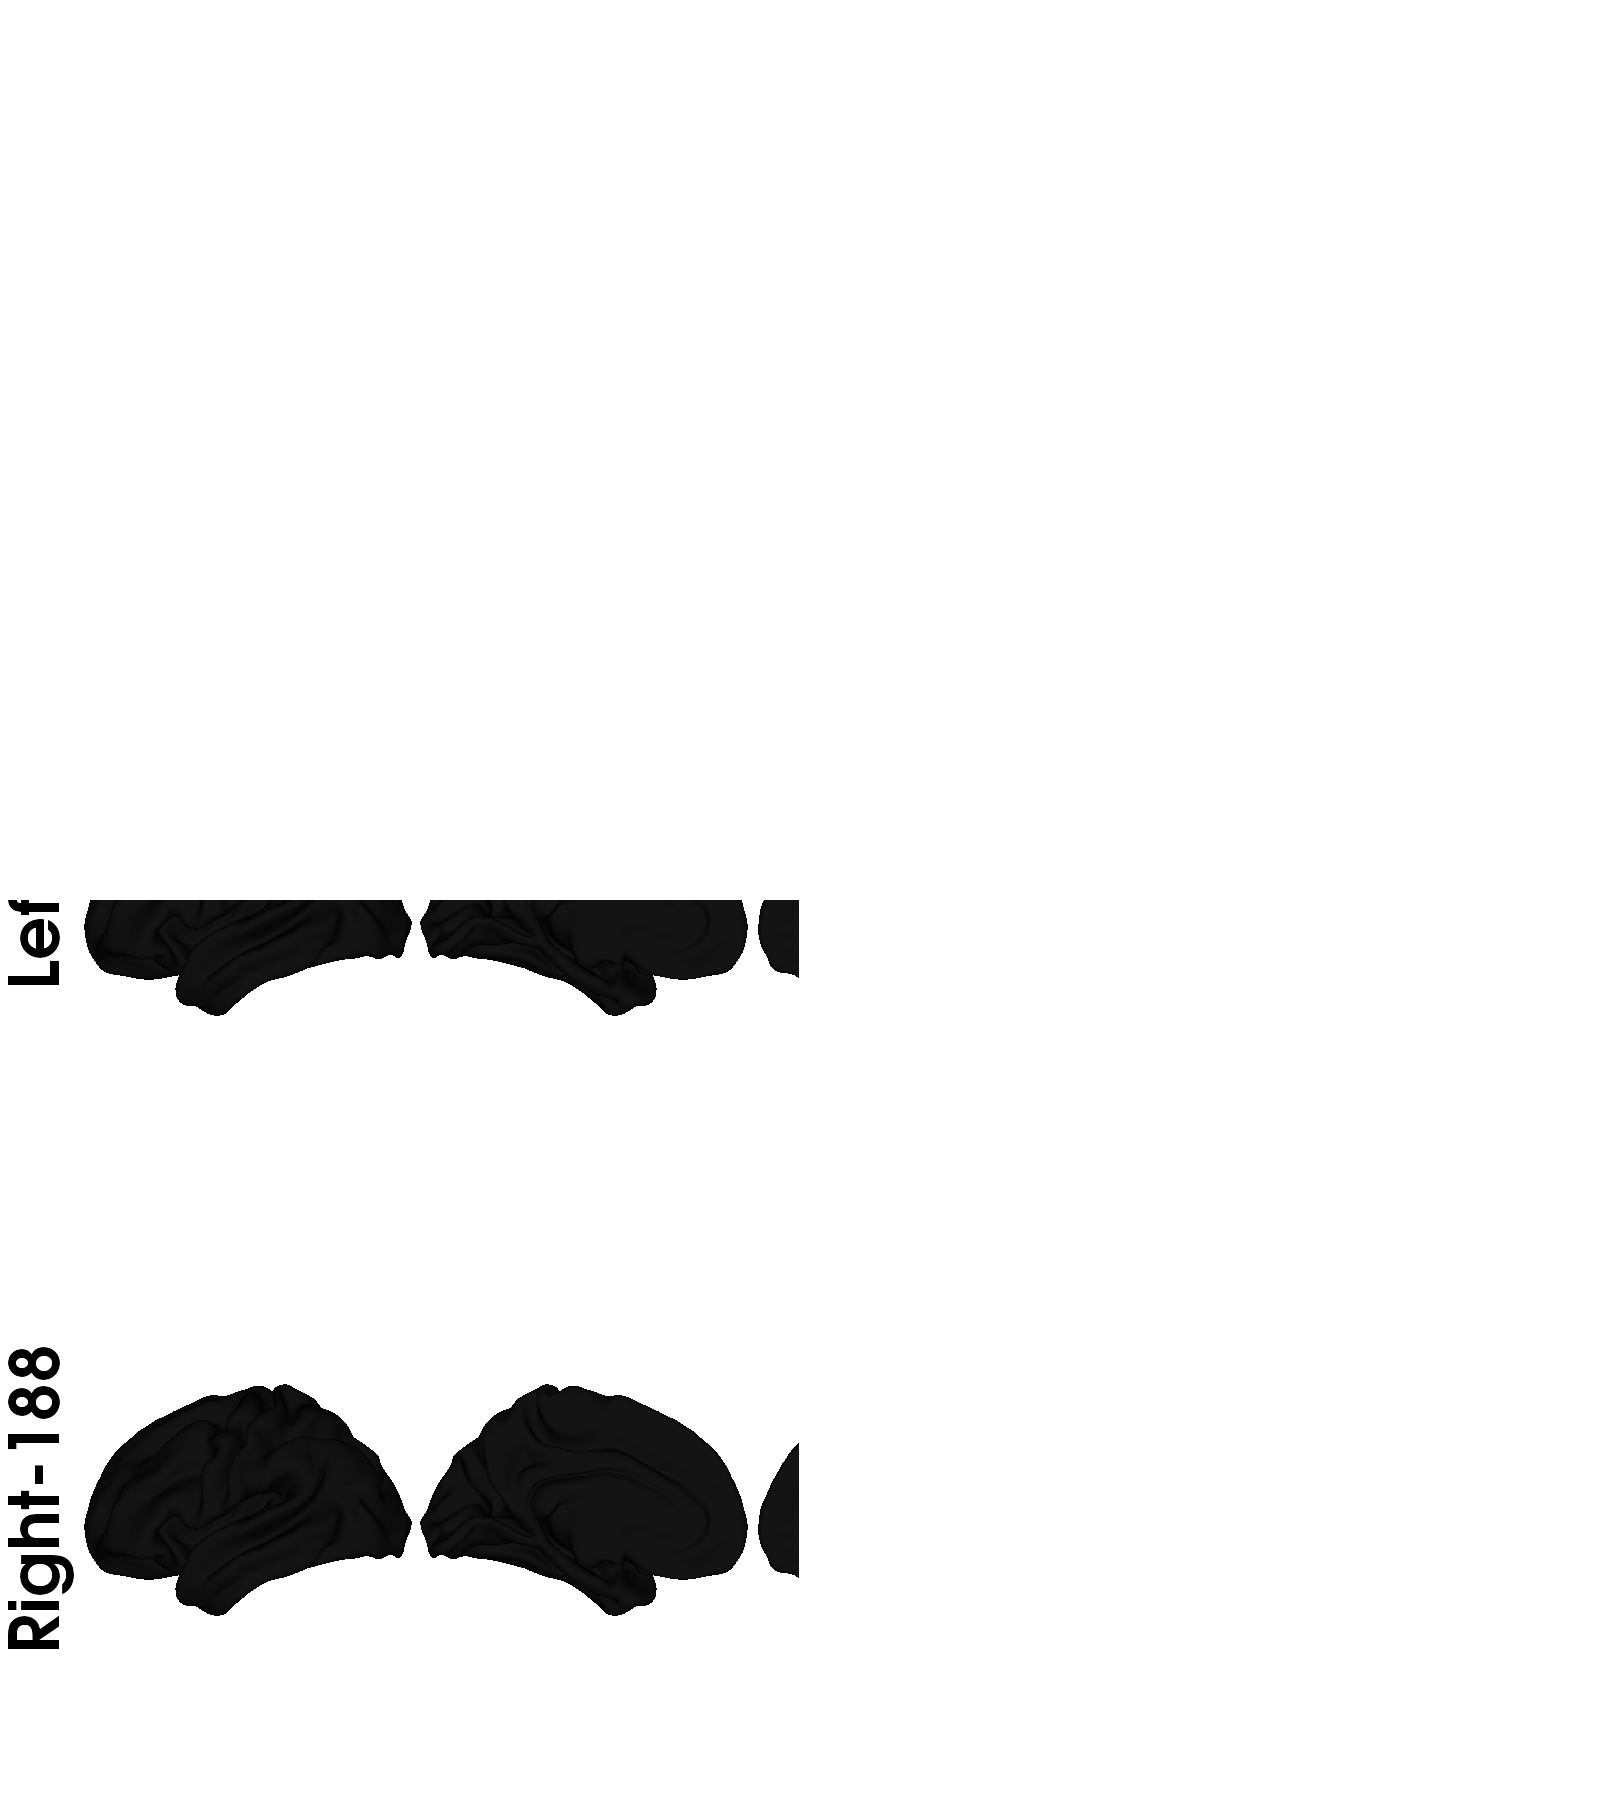

In [322]:
# Create arrays
ROI = 8
Glasserfloat[Glasser == 0] = np.nan
PMC_labels = ['Both', 'Left-4', 'Right-188']
PMCrois = [None] * 3
PMCrois[0]  = np.where((Glasser == ROI) | (Glasser == ROI+180), 1, 0)
PMCrois[1] = Glasser == ROI
PMCrois[2] = Glasser == ROI+180

# Plot of the array
plot_hemispheres(surf_lh, surf_rh, array_name=PMCrois, size=(800, 300*3),label_text=PMC_labels,
                 cmap='copper', zoom=1.25, color_bar=True, embed_nb=True, interactive=False, nan_color=(0, 0, 0, 1))

## Function to plot unique ROIs

In [315]:
## Function that plots unique ROIs

## Plot a vector of values to the surface

In [299]:
# Create an array with random values from -1 to 1
rho_rand = np.concatenate((0, np.random.uniform(-1,1,[360,1])), axis=None)
rho_ver = map_to_labels(rho_rand, Glasser, mask=mask,fill=np.nan)

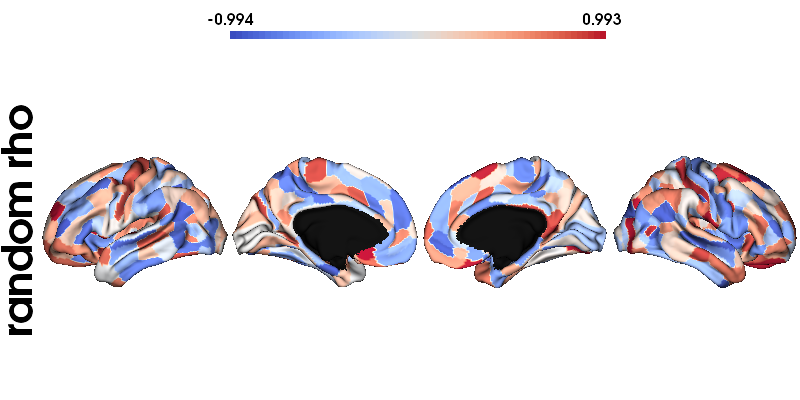

In [300]:
# Plot 
# Label text for column/row. Possible keys are {'left', 'right','top', 'bottom'}
# label_text : dict[str, array-like], optional
#         Label text for column/row. Possible keys are {'left', 'right',
#         'top', 'bottom'}, which indicate the location. Default is None.
plot_hemispheres(surf_lh, surf_rh, array_name=rho_ver, size=(800, 400), label_text={'left':['random rho']}, color_bar='top',
                 cmap='coolwarm', zoom=1.25, embed_nb=True, interactive=False, share='both')

## Widget: Rho threshold

## Customize a colormap

In [318]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
black = np.array([0, 0, 0, 1])
newcolors[0, :] = black
newcmp = ListedColormap(newcolors)
newcolors[0:3, :]

array([[0.      , 0.      , 0.      , 1.      ],
       [0.26851 , 0.009605, 0.335427, 1.      ],
       [0.269944, 0.014625, 0.341379, 1.      ]])

# More settings for surface plotting with **plot_surf**
### Colorbar position. 
top, left, right, bottom


In [317]:
# Position of the color bar

### Modifiying the layout (2 x 2)... in preparation

In [316]:
# Ditionary with the surfaces
# surfs = {'lh': surf_lh, 'rh': surf_rh}
# # Plot Layout (shape = (n_rows, n_cols))
# layout = np.array([['lh', 'lh'], ['rh', 'rh']])
# view = ['lateral', 'medial', 'lateral', 'medial']
# kwds = {'share': 'r'}

In [319]:
# plot_surf(surfs, layout, array_name=rho_ver, view=view, color_bar='bottom',
#               color_range='Sym', share=False, label_text='rho', cmap='twilight',
#               nan_color=(0, 0, 0, 1), zoom=1, background=(1, 1, 1),
#               size=(400, 400), embed_nb=True, interactive=False, scale=(1, 1),
#               transparent_bg=True, screenshot=False, filename=None,
#               return_plotter=True)

## Request and questions  
#### kwarg ???
  
#### Superior and inferior view

#### How do you define the range
color_range=[-7:7]

#### Label_text size
can we cuztomize it?